In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix 

df =  pd.read_csv('heart.csv')

X = df.drop('output' , axis = 1)
y= df['output']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter = 2000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print (confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



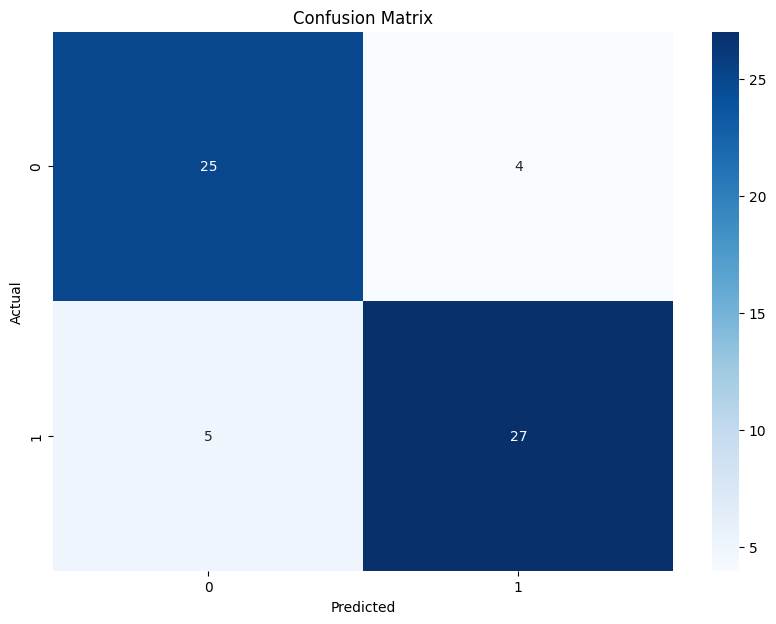

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True, fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
from sklearn.metrics import roc_curve , roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]

fpr , tpc , thresholds = roc_curve(y_test , y_prob)

auc = roc_auc_score(y_test , y_prob)

print("AUC:" , auc)


AUC: 0.9267241379310345


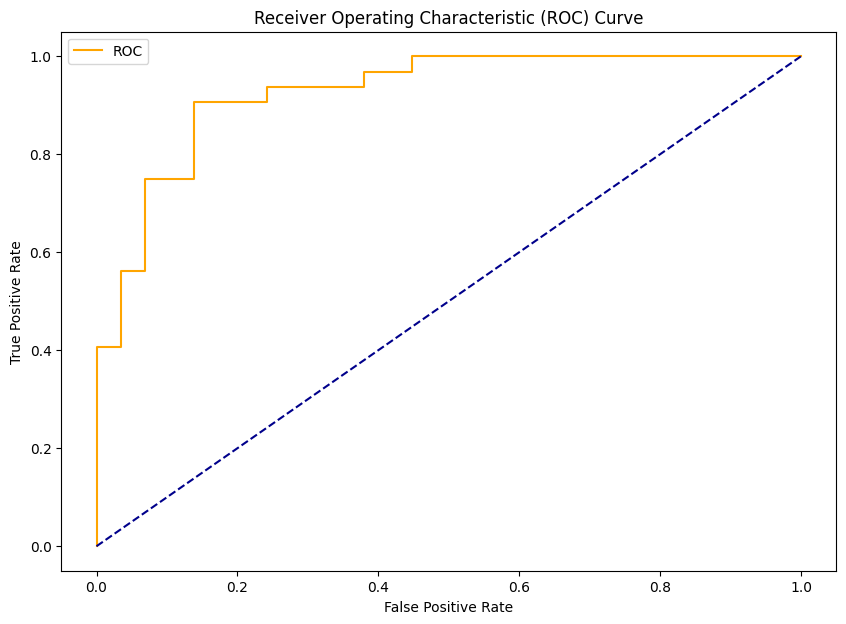

In [5]:
plt.figure = plt.figure(figsize = (10,7))
plt.plot(fpr , tpc , color = 'orange' , label = 'ROC')
plt.plot([0,1] , [0,1] , color = 'darkblue' , linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
